In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn import preprocessing

In [2]:
comp=pd.read_csv("Company_Data.csv")

In [3]:
comp.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
comp.shape

(400, 11)

In [5]:
comp.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
lb=preprocessing.LabelEncoder()
for i in range(0,comp.shape[1]):
    if comp.dtypes[i]=='object':
        comp[comp.columns[i]]=lb.fit_transform(comp[comp.columns[i]])

In [9]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


# convert target variable sales into categorical variable

In [10]:
comp["cat_sales"]=""
comp.loc[(comp["Sales"]>=0.00)&(comp["Sales"]<=5.423),"cat_sales"]="low"
comp.loc[(comp["Sales"]>5.423)&(comp["Sales"]<=10.846),"cat_sales"]="Medium"
comp.loc[(comp["Sales"]>10.846)&(comp["Sales"]<=16.27),"cat_sales"]="high"

In [11]:
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,cat_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


In [12]:
comp.cat_sales.value_counts()


Medium    247
low       102
high       51
Name: cat_sales, dtype: int64

Text(0, 0.5, 'count')

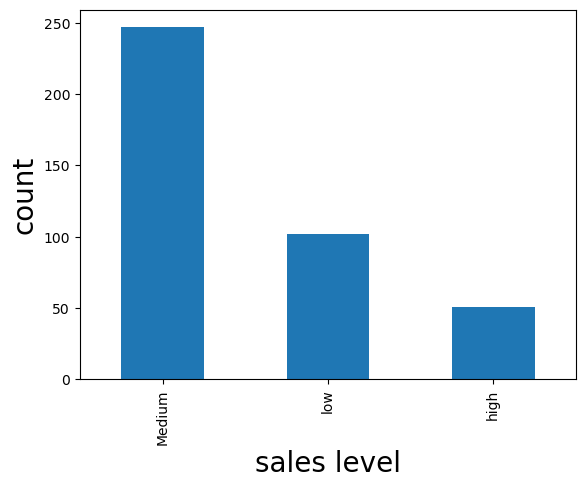

In [29]:
comp.cat_sales.value_counts().plot(kind='bar')
plt.xlabel("sales level",size=20)
plt.ylabel("count",size=20)


In [13]:
x=comp.iloc[:,1:-1]
y=comp.iloc[:,-1]

In [14]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [15]:
y

0      Medium
1        high
2      Medium
3      Medium
4         low
        ...  
395      high
396    Medium
397    Medium
398    Medium
399    Medium
Name: cat_sales, Length: 400, dtype: object

# preparing a model with gini 

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [17]:
model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=10)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [18]:
pred=model.predict(X_test)
accuracy_score(y_test,pred)

0.6875

In [19]:
pred1=model.predict(X_train)
accuracy_score(y_train,pred1)

0.965625

In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Medium       0.68      0.81      0.74        42
        high       0.55      0.46      0.50        13
         low       0.79      0.60      0.68        25

    accuracy                           0.69        80
   macro avg       0.67      0.62      0.64        80
weighted avg       0.69      0.69      0.68        80



In [21]:
plt.subplots(figsize = (4,4), dpi=3000)
tree.plot_tree(model)

[Text(0.3741155660377358, 0.9545454545454546, 'X[5] <= 0.5\ngini = 0.518\nsamples = 320\nvalue = [205, 38, 77]'),
 Text(0.16037735849056603, 0.8636363636363636, 'X[4] <= 102.5\ngini = 0.523\nsamples = 81\nvalue = [38, 2, 41]'),
 Text(0.07547169811320754, 0.7727272727272727, 'X[6] <= 68.5\ngini = 0.38\nsamples = 30\nvalue = [23, 2, 5]'),
 Text(0.03773584905660377, 0.6818181818181818, 'X[3] <= 69.0\ngini = 0.254\nsamples = 21\nvalue = [18, 2, 1]'),
 Text(0.018867924528301886, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.05660377358490566, 0.5909090909090909, 'X[6] <= 29.0\ngini = 0.185\nsamples = 20\nvalue = [18, 1, 1]'),
 Text(0.03773584905660377, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.07547169811320754, 0.5, 'X[4] <= 96.5\ngini = 0.105\nsamples = 18\nvalue = [17, 0, 1]'),
 Text(0.05660377358490566, 0.4090909090909091, 'gini = 0.0\nsamples = 13\nvalue = [13, 0, 0]'),
 Text(0.09433962264150944, 0.4090909090909091, 'X[0] <= 103.5\ngini = 

# Decision Tree Classifier(CART) using entropy criteria

In [22]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [23]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [24]:
pred1=model1.predict(X_test)
accuracy_score(y_test,pred1)

0.7

In [25]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

      Medium       0.68      0.81      0.74        42
        high       0.75      0.69      0.72        13
         low       0.72      0.52      0.60        25

    accuracy                           0.70        80
   macro avg       0.72      0.67      0.69        80
weighted avg       0.70      0.70      0.69        80

